In [106]:
#importing the required packs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn.metrics import classification_report,accuracy_score
from skimage import color
from skimage import io
from imutils import paths



In [107]:
import tensorflow as tf
import keras


In [108]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

(512, 512)


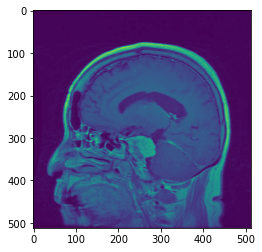

In [142]:
#1. IMAGE PRE-PROCESSING
#The actions in this section will help the main SVM model to work with the images provided and preferably also reduce the
# size/shape of the data so that the memory of the code will not exceed the limit Jupyter Notebook has. 

#Creating a path for the source dataset (which are the images) and storing it in a list.
path=(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\dataset\image")
images_list= []
images_paths = sorted(list(paths.list_images(path)))

#One of our first tasks will be to convert the pixels of the images into an array form. 
#To do this, we must first make sure that the images provided are in grayscale.
for path in images_paths:
    file=cv2.imread(path)
    images_grayscale = cv2.cvtColor(file,cv2.COLOR_BGR2GRAY)
    images_list.append(images_grayscale)


    
plt.imshow(images_list[0])
print(images_list[0].shape)

#This prepares the labels so they can be processed: 
file_labels = pd.read_csv(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\dataset\label.csv")
Images = []
Labels = []

In [110]:
file_labels = pd.read_csv(r"C:\Users\melek\OneDrive\Belgeler\Year 4\AMLS\CW\dataset\label.csv")


In [111]:
all_labels=list(set(file_labels['label'].tolist()))
print('All possible labels:', all_labels)
labels_map = {all_labels[x]:x for x in range (len(all_labels))}
print(labels_map)

All possible labels: ['glioma_tumor', 'no_tumor', 'pituitary_tumor', 'meningioma_tumor']
{'glioma_tumor': 0, 'no_tumor': 1, 'pituitary_tumor': 2, 'meningioma_tumor': 3}


In [112]:
#One hot encoding
from tensorflow import one_hot
one_hot_matrix = np.zeros([len(file_labels['file_name'].tolist()),len(all_labels)])
for x in range(one_hot_matrix.shape[0]):
    one_hot_matrix[x, labels_map[file_labels['label'].iloc[x]]]=1
                

In [169]:
print(one_hot_matrix)
encoded_labels=one_hot_matrix

for x in range (0,3000):
    Images.append(images_list[x])

Labels.append(one_hot_matrix)


[[0. 0. 0. 1.]
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 ...
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 1. 0.]]


In [170]:
Images=np.array(Images)

print(Images.shape)

(3000, 512, 512)


In [138]:
#image_array = cv2.resize(img_array, (img_size,img_size))
#print(Images.shape)
#Images_normalized=(Images)/255.0
#print(Images_normalized.shape)
#Images_reshaped=Images_normalized.reshape(-1,128,128,1)
#print(Images_reshaped.shape)


(3000, 512, 512)
(3000, 512, 512)
(48000, 128, 128, 1)


In [171]:
Images, encoded_labels = shuffle(Images,encoded_labels)
x_train, x_test, y_train, y_test = train_test_split(Images,encoded_labels, train_size=0.8, random_state=1)

In [172]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(2400, 512, 512)
(2400, 4)
(600, 512, 512)
(600, 4)


In [181]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical, normalize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D,MaxPool2D
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import GlobalAveragePooling2D

In [26]:
#input_layer = Input((30,24,48))

#model = Conv2D(20,(5,5), input_shape = (30,24,48), activation = "relu", strides = 1, padding = "valid")(input_layer)
#model = MaxPooling2D(pool_size=(2,2))(model)        
#model = Conv2D(50, (5,5), use_bias = 50)(model)    
#model = MaxPooling2D(pool_size=(2,2))(model)  
#model = Flatten()(model)
#model = Dense(20, activation = "relu")(model)
#model = tf.expand_dims(model, axis=-1)
#model = LSTM(50, activation="relu", return_sequences=True)(model)

In [193]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same', input_shape=[512,512,1]))
model.add(MaxPool2D())
model.add(Conv2D(filters=32, kernel_size=5, activation="relu", padding='same'))
model.add(MaxPool2D())
model.add(Flatten())
model.add(Dense(units=20, activation="relu"))
model.add(Dense(units=10, activation="relu"))
model.add(Dense(units=4, activation="softmax"))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
history = model.fit(x_train,y_train,validation_split=0.1,epochs=10)

Epoch 1/10
68/68 [==============================] - 763s 11s/step - loss: 11.8382 - accuracy: 0.4120 - val_loss: 0.9843 - val_accuracy: 0.6250
Epoch 2/10
68/68 [==============================] - 790s 12s/step - loss: 0.8495 - accuracy: 0.6986 - val_loss: 0.8286 - val_accuracy: 0.6708
Epoch 3/10
68/68 [==============================] - 645s 9s/step - loss: 0.6305 - accuracy: 0.7681 - val_loss: 0.8531 - val_accuracy: 0.7417
Epoch 4/10
68/68 [==============================] - 1372s 20s/step - loss: 0.4735 - accuracy: 0.8347 - val_loss: 0.7219 - val_accuracy: 0.8000
Epoch 5/10
68/68 [==============================] - 1442s 21s/step - loss: 0.3439 - accuracy: 0.8736 - val_loss: 0.8387 - val_accuracy: 0.7750
Epoch 6/10
68/68 [==============================] - 1243s 18s/step - loss: 0.2627 - accuracy: 0.9093 - val_loss: 0.8360 - val_accuracy: 0.8000
Epoch 7/10
68/68 [==============================] - 1146s 17s/step - loss: 0.1922 - accuracy: 0.9454 - val_loss: 0.9945 - val_accuracy: 0.7583
Ep

In [179]:
#model = Sequential()
#model = Conv2D(20,(5,5), input_shape = (3000,512,512), activation = "relu", strides = 1, padding = "valid")(all_labels)
#model.add(Dense(20, input_dim=(512), kernel_initializer='random_uniform', activation='sigmoid'))
#model.add(Dense(4, activation='softmax'))
#model.compile(loss='binary_crossentropy', optimizer='adam')
#model.fit(x_train,y_train,batch_size=2400,epochs=10,verbose=1,validation_split=0.1)
#layers.Conv2D(filters=32, kernel_size=5, activation="relu", padding='same',
    #              # give the input dimensions in the first layer
    #              # [height, width, color channels(RGB)]
    #              input_shape=[512, 512, 1]),
    #layers.MaxPool2D(),

TypeError: Inputs to a layer should be tensors. Got: glioma_tumor

In [174]:

model = Sequential()
model.add(Dense(20, kernel_initializer='random_normal', activation='relu'))
model.add(Dense(512, 4, activation='sigmoid'))
model.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])

# Fit data to model
model.fit(x_train,y_train,batch_size=2400,epochs=10,verbose=1,validation_split=0)


Epoch 1/10


ValueError: in user code:

    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\engine\training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\engine\training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\engine\training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\engine\training.py", line 809, in train_step
        loss = self.compiled_loss(
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\engine\compile_utils.py", line 201, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\losses.py", line 141, in __call__
        losses = call_fn(y_true, y_pred)
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\losses.py", line 245, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\losses.py", line 1664, in categorical_crossentropy
        return backend.categorical_crossentropy(
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\backend.py", line 4994, in categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)

    ValueError: Shapes (2400, 4) and (2400, 512, 4) are incompatible


In [39]:

y_pred=model.predict(x_train)
acc = accuracy_score(y_test, ypred)

ValueError: in user code:

    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\engine\training.py", line 1621, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\engine\training.py", line 1611, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\engine\training.py", line 1604, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\engine\training.py", line 1572, in predict_step
        return self(x, training=False)
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\utils\traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\melek\anaconda3\envs\Lab\lib\site-packages\keras\engine\input_spec.py", line 263, in assert_input_compatibility
        raise ValueError(f'Input {input_index} of layer "{layer_name}" is '

    ValueError: Input 0 of layer "sequential_4" is incompatible with the layer: expected shape=(None, 2400, 512, 512), found shape=(None, 512, 512)


In [151]:
y_train


array([[0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.]])